In [35]:
from numpy import *
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import AxionFuncs
import Like

# Generate Tabulated spectra
nm = 1000
m_vals = logspace(-4.0,2e0,nm)
E_max = 20.0
nE_bins = 500

n_DL = 1000
m_DL_vals = logspace(log10(1e-3),log10(2e-1),n_DL)


E_min = 10.0e-3
E_bins,R1_tab,R0 = AxionFuncs.BinnedPhotonNumberTable_Primakoff(m_vals,E_min,E_max,nE_bins,nfine=500,res_on=False) 
DL1 = Like.MassDiscoveryLimit(m_vals,R1_tab,R0,m_DL_vals,gmin=5e-12,gmax=1e-9,ng=500)

print 1

E_min = 100.0e-3
E_bins,R1_tab,R0 = AxionFuncs.BinnedPhotonNumberTable_Primakoff(m_vals,E_min,E_max,nE_bins,nfine=500,res_on=False) 
DL2 = Like.MassDiscoveryLimit(m_vals,R1_tab,R0,m_DL_vals,gmin=5e-12,gmax=1e-9,ng=500)

print 2

E_min = 200.0e-3
E_bins,R1_tab,R0 = AxionFuncs.BinnedPhotonNumberTable_Primakoff(m_vals,E_min,E_max,nE_bins,nfine=500,res_on=False) 
DL3 = Like.MassDiscoveryLimit(m_vals,R1_tab,R0,m_DL_vals,gmin=5e-12,gmax=1e-9,ng=500)

print 3

E_min = 400.0e-3
E_bins,R1_tab,R0 = AxionFuncs.BinnedPhotonNumberTable_Primakoff(m_vals,E_min,E_max,nE_bins,nfine=500,res_on=False) 
DL4 = Like.MassDiscoveryLimit(m_vals,R1_tab,R0,m_DL_vals,gmin=5e-12,gmax=1e-9,ng=500)

print 4

E_min = 600.0e-3
E_bins,R1_tab,R0 = AxionFuncs.BinnedPhotonNumberTable_Primakoff(m_vals,E_min,E_max,nE_bins,nfine=500,res_on=False) 
DL5 = Like.MassDiscoveryLimit(m_vals,R1_tab,R0,m_DL_vals,gmin=5e-12,gmax=1e-9,ng=500)

print 5

E_min = 1.0e-3
E_bins,R1_tab,R0 = AxionFuncs.BinnedPhotonNumberTable_Primakoff(m_vals,E_min,E_max,nE_bins,nfine=500,res_on=False) 
DL0 = Like.MassDiscoveryLimit(m_vals,R1_tab,R0,m_DL_vals,gmin=5e-12,gmax=1e-9,ng=500)

print 0

1
2
3
4
5
0


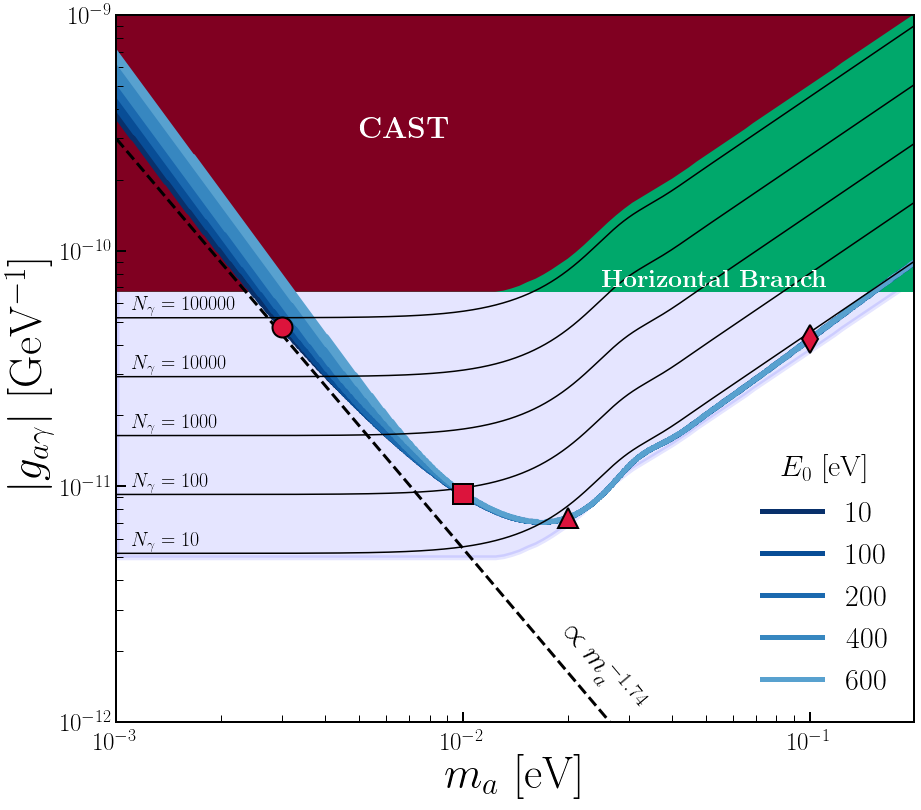

In [36]:
plt.rcParams['axes.linewidth'] = 2
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=(14.3,13))
ax = fig.add_subplot(111)


# IAXO limit
m1 = logspace(log10(1e-3),log10(2e-1),100)
IAXO = Like.CouplingDiscoveryLimit(m_vals,R1_tab,m1,gmin=5e-12,gmax=1e-9,ng=1000)
plt.fill_between(m1,IAXO,y2=1e-9,edgecolor="Blue",facecolor="Blue",alpha=0.1,linewidth=5)

# HB limit
HB_col = [0.0, 0.66, 0.42]
HBmin = 6.7e-11
plt.fill_between([1e-3,1e0],[HBmin,HBmin],y2=1e-9,edgecolor=None,facecolor=HB_col)

# CAST limit
CAST_col = [0.5, 0.0, 0.13]
CAST = IAXO*13.4
plt.fill_between(m1,CAST,y2=1e-9,edgecolor=None,facecolor=CAST_col)
plt.text(2.5e-2,7e-11,r'{\bf Horizontal Branch}',fontsize=25,color='w')
plt.text(5e-3,3e-10,r'{\bf CAST}',fontsize=30,color='w')


# Plot discovery limits for different resolutions
col = flipud(cm.Blues(linspace(0,1,10)))
plt.loglog(m_DL_vals,DL1,linewidth=5,label="10",color=col[0,:])
plt.loglog(m_DL_vals,DL2,linewidth=5,label="100",color=col[1,:])
plt.loglog(m_DL_vals,DL3,linewidth=5,label="200",color=col[2,:])
plt.loglog(m_DL_vals,DL4,linewidth=5,label="400",color=col[3,:])
plt.loglog(m_DL_vals,DL5,linewidth=5,label="600",color=col[4,:])
plt.fill_between(m_DL_vals,DL5,y2=DL0,linewidth=5,facecolor=col[4,:])
plt.fill_between(m_DL_vals,DL4,y2=DL0,linewidth=5,facecolor=col[3,:])
plt.fill_between(m_DL_vals,DL3,y2=DL0,linewidth=5,facecolor=col[2,:])
plt.fill_between(m_DL_vals,DL2,y2=DL0,linewidth=5,facecolor=col[1,:])

# Plot g ~ m^-1.74 line
plt.plot(m_DL_vals,1.8e-15*m_DL_vals**-1.74,'k--',linewidth=3)
plt.text(1.8e-2,2.1e-12,r'$\propto m_a^{-1.74}$',fontsize=30,rotation=-50)

# Plot constant event numbers lines
for Ngamma in [10,100,1000,10000,100000]:
    Nline = Like.ConstantObsNumberLine(Ngamma,m_DL_vals,m_vals,R1_tab)
    plt.loglog(m_DL_vals,Nline,'k-')
    plt.text(1.1e-3,Nline[0]*1.05,r'$N_\gamma$ = '+str(Ngamma),fontsize=20)

# Plot markers from Likelihood figure
mp = [3e-3,1e-2,2e-2,1e-1]
DLp = Like.MassDiscoveryLimit(m_vals,R1_tab,R0,mp,gmin=5e-12,gmax=1e-9,ng=500)
markerz = ['o','s','^','d']    
for i in range(0,size(mp)):
    plt.plot(mp[i],DLp[i],markerz[i],color='Crimson',markersize=20,markeredgecolor='k',markeredgewidth=2)


# Style
plt.xlim([1e-3,2e-1])
plt.ylim([1e-12,1e-9])
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.tick_params(which='major',direction='in',width=2,length=10)
ax.tick_params(which='minor',direction='in',width=1,length=7)
ax.tick_params(axis='x', which='major', pad=10)
plt.xlabel(r"$m_a$ [eV]",fontsize=45)
plt.ylabel(r"$|g_{a\gamma}|$ [GeV$^{-1}$]",fontsize=45)

# Legend
leg = plt.legend(fontsize=30,frameon=False,title=r'$E_0$ [eV]',loc="lower right")
plt.setp(leg.get_title(),fontsize=30)

# Show and save
plt.show()
fig.savefig('../plots/MassDiscoveryLimit_Photon.pdf',bbox_inches='tight')